In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
da = pd.read_csv(r"C:\Users\LENOVO\Downloads\diabetes.csv")

# Exploratory Data Analysis

In [3]:
da.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
da.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
da.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
nullcount = print(da.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
BP = da["BloodPressure"].mean()
ST = da["SkinThickness"].mean()
BMIM = da["BMI"].mean()

da['BloodPressure'] = da['BloodPressure'].replace(0, BP)
da['SkinThickness'] = da['SkinThickness'].replace(0, ST)
da['BMI'] = da['BMI'].replace(0, BMIM)

da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [8]:
da['Outcome'].value_counts()


0    500
1    268
Name: Outcome, dtype: int64

In [9]:
# The distribution of the Outcome variable
da["Outcome"].value_counts()*100/len(da)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [10]:
da.groupby("Outcome").agg({"Pregnancies":"mean"})


,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [11]:
da.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [12]:
da.groupby("Outcome").agg({"Insulin": "mean"})


,Insulin
Outcome,
0,68.792000
1,100.335821


In [13]:
da.groupby("Outcome").agg({"Insulin": "max"})


,Insulin
Outcome,
0,744
1,846


In [14]:
da.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [15]:
da.groupby("Outcome").agg({"Glucose": "max"})

,Glucose
Outcome,
0,197
1,199


In [16]:
da.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.880066
1,35.381288


# Data Preprocessing

#checking duplicate values in dataset

In [17]:
da.duplicated().sum()

0

In [18]:
# there is no duplicate values in this dataset

In [19]:
# checking null values in dataset
da.isna().sum()
# there is no null values in this dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
(da[da.columns] == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [21]:
# Replacing 0 values with mean

for i in ["Glucose","BMI","Insulin","BloodPressure"]:
    da[i].replace({0:da[i].mean()},inplace = True)


In [22]:
# checking again for 0 values

(da[da.columns] == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

# Outlier Observation Analysis 

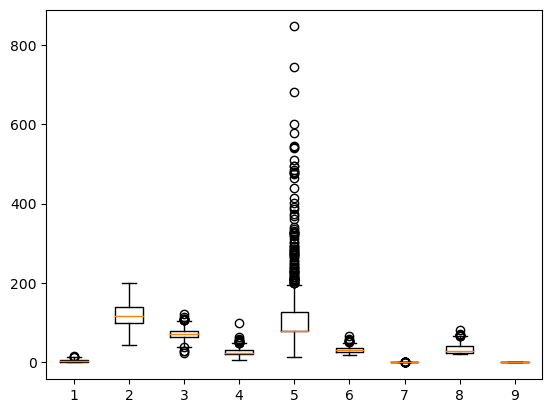

In [23]:
# checking outliers in variables
plt.boxplot(da);

In [24]:
def outlier_treatment():
    l = ["BMI","Glucose","SkinThickness","Age","BloodPressure","Insulin","Pregnancies","DiabetesPedigreeFunction"]
    for i in l:
        x = np.quantile(da[i],[0.25,0.75])
        iqr = x[1]-x[0]
        uw = x[1]+1.5*iqr
        lw = x[0]-1.5*iqr
        da[i]  = np.where(da[i]>uw,uw,(np.where(da[i]<lw,lw,da[i])))
        
outlier_treatment()

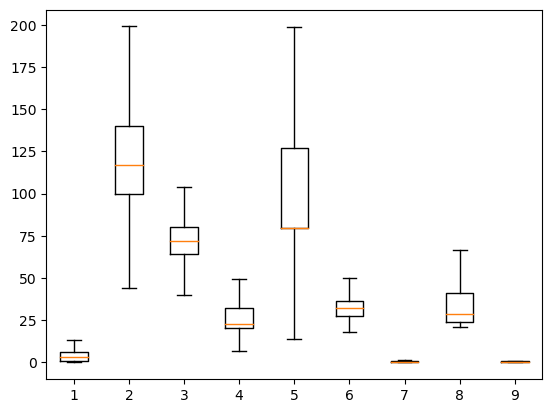

In [25]:
#boxplot after treating outliers


plt.boxplot(da);

# Visualization of dataset 

        Data distribution of variables

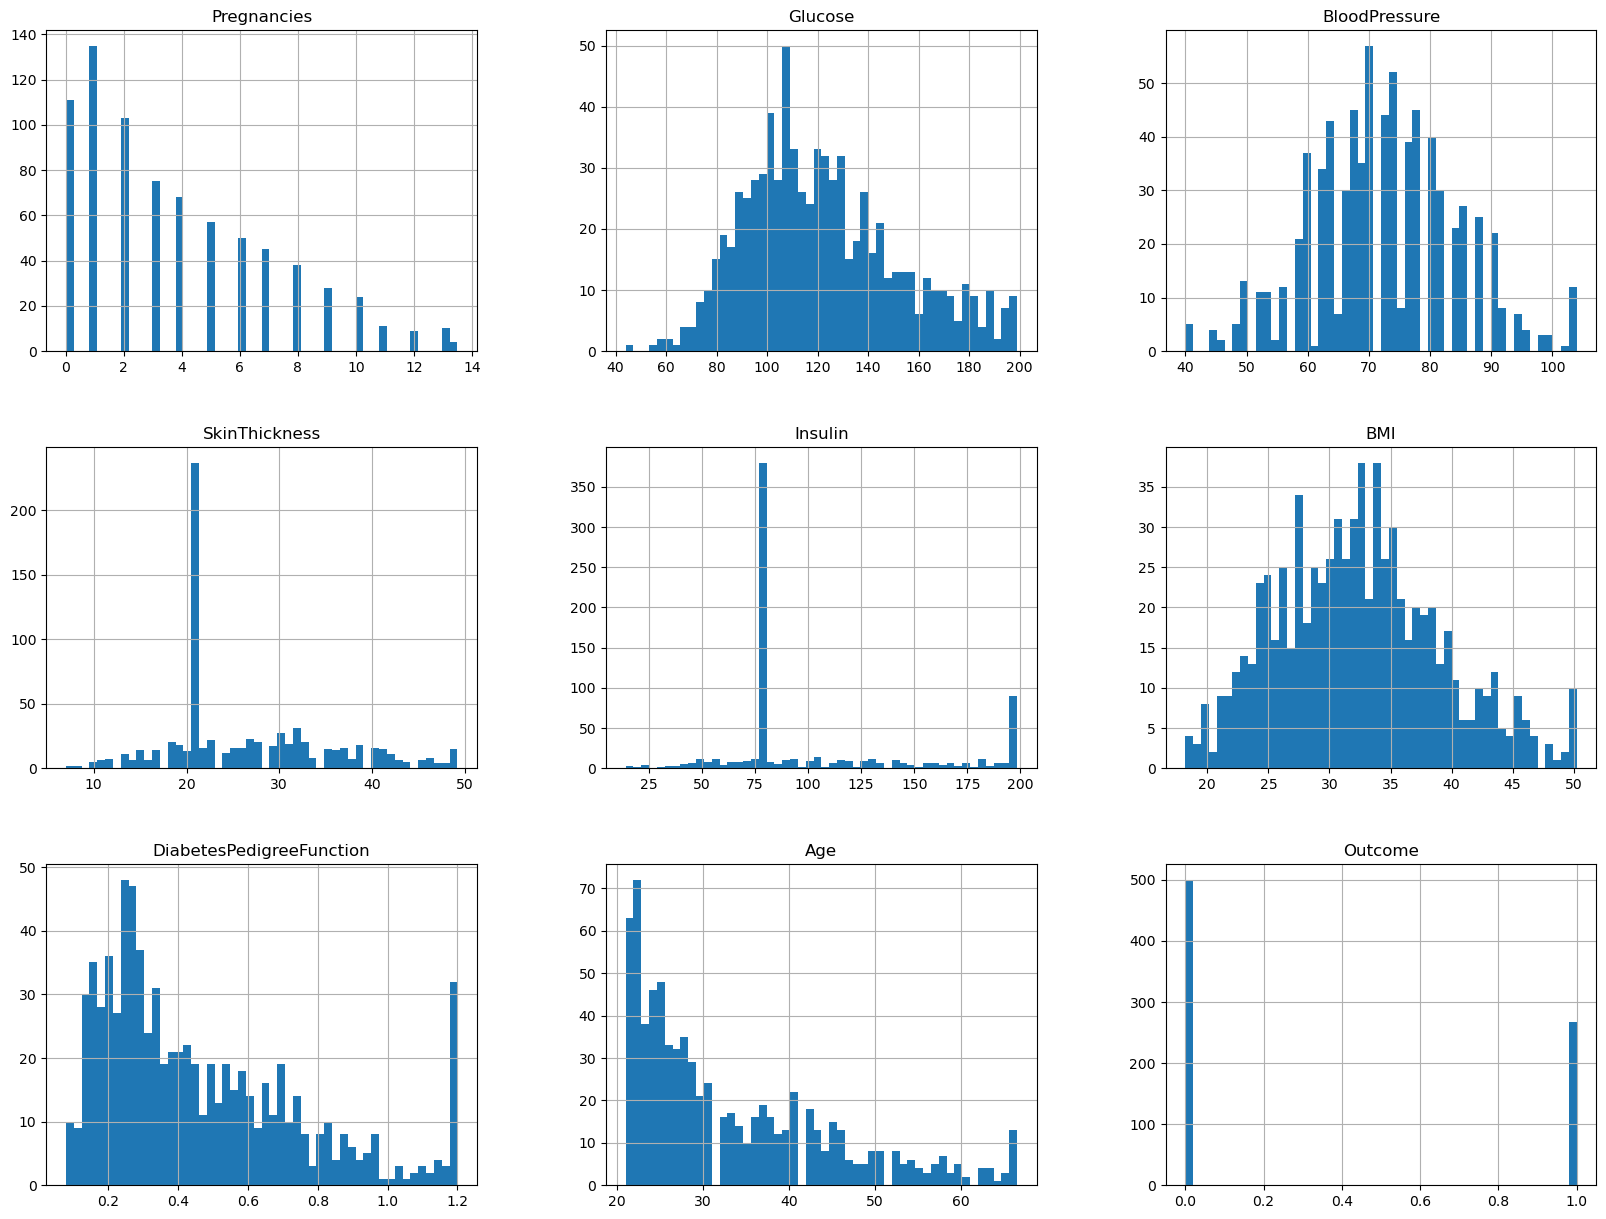

In [26]:
da.hist(bins=50, figsize=(20,15));

Data distribution of Output variable

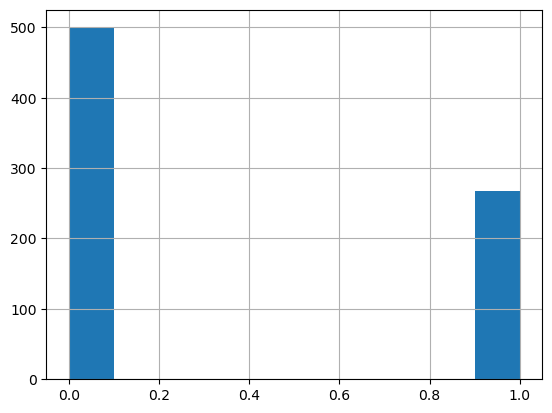

In [27]:
da['Outcome'].hist();

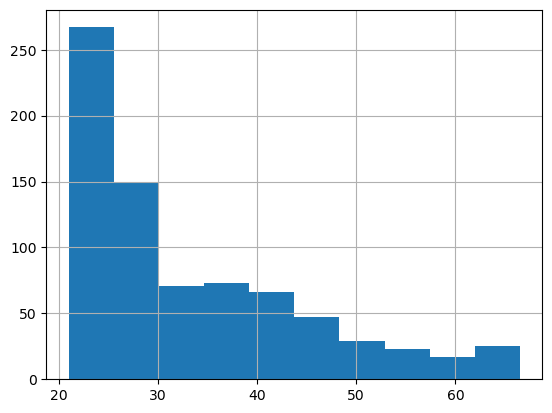

In [28]:
# Data distribution of Age variable
da['Age'].hist();


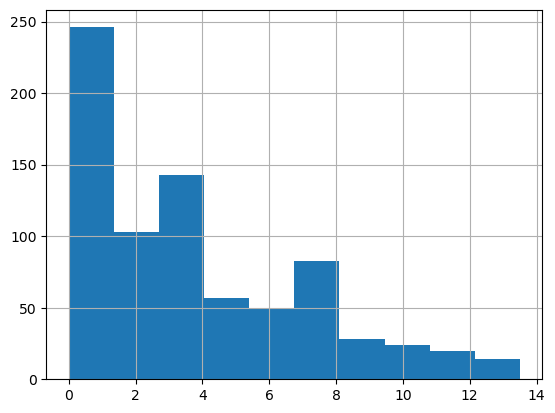

In [29]:
# Data distribution of Pregnancies variable

da['Pregnancies'].hist();


In [30]:
#Checking correlation between variables
da.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.126606,0.211257,0.020722,-0.007679,0.027144,-0.017398,0.549695,0.220392
Glucose,0.126606,1.000000,0.220946,0.149026,0.394778,0.234041,0.118236,0.268602,0.492908
BloodPressure,0.211257,0.220946,1.000000,0.145294,0.017952,0.286508,0.015067,0.334903,0.166131
SkinThickness,0.020722,0.149026,0.145294,1.000000,0.303747,0.548198,0.134284,0.013831,0.173868
Insulin,-0.007679,0.394778,0.017952,0.303747,1.000000,0.225814,0.180001,0.038798,0.208749
BMI,0.027144,0.234041,0.286508,0.548198,0.225814,1.000000,0.138545,0.035865,0.313035
DiabetesPedigreeFunction,-0.017398,0.118236,0.015067,0.134284,0.180001,0.138545,1.000000,0.047289,0.184969
Age,0.549695,0.268602,0.334903,0.013831,0.038798,0.035865,0.047289,1.000000,0.242702
Outcome,0.220392,0.492908,0.166131,0.173868,0.208749,0.313035,0.184969,0.242702,1.000000


In [31]:
da.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492908
BMI                         0.313035
Age                         0.242702
Pregnancies                 0.220392
Insulin                     0.208749
DiabetesPedigreeFunction    0.184969
SkinThickness               0.173868
BloodPressure               0.166131
Name: Outcome, dtype: float64

Text(0.5, 1.0, 'correlation of feature')

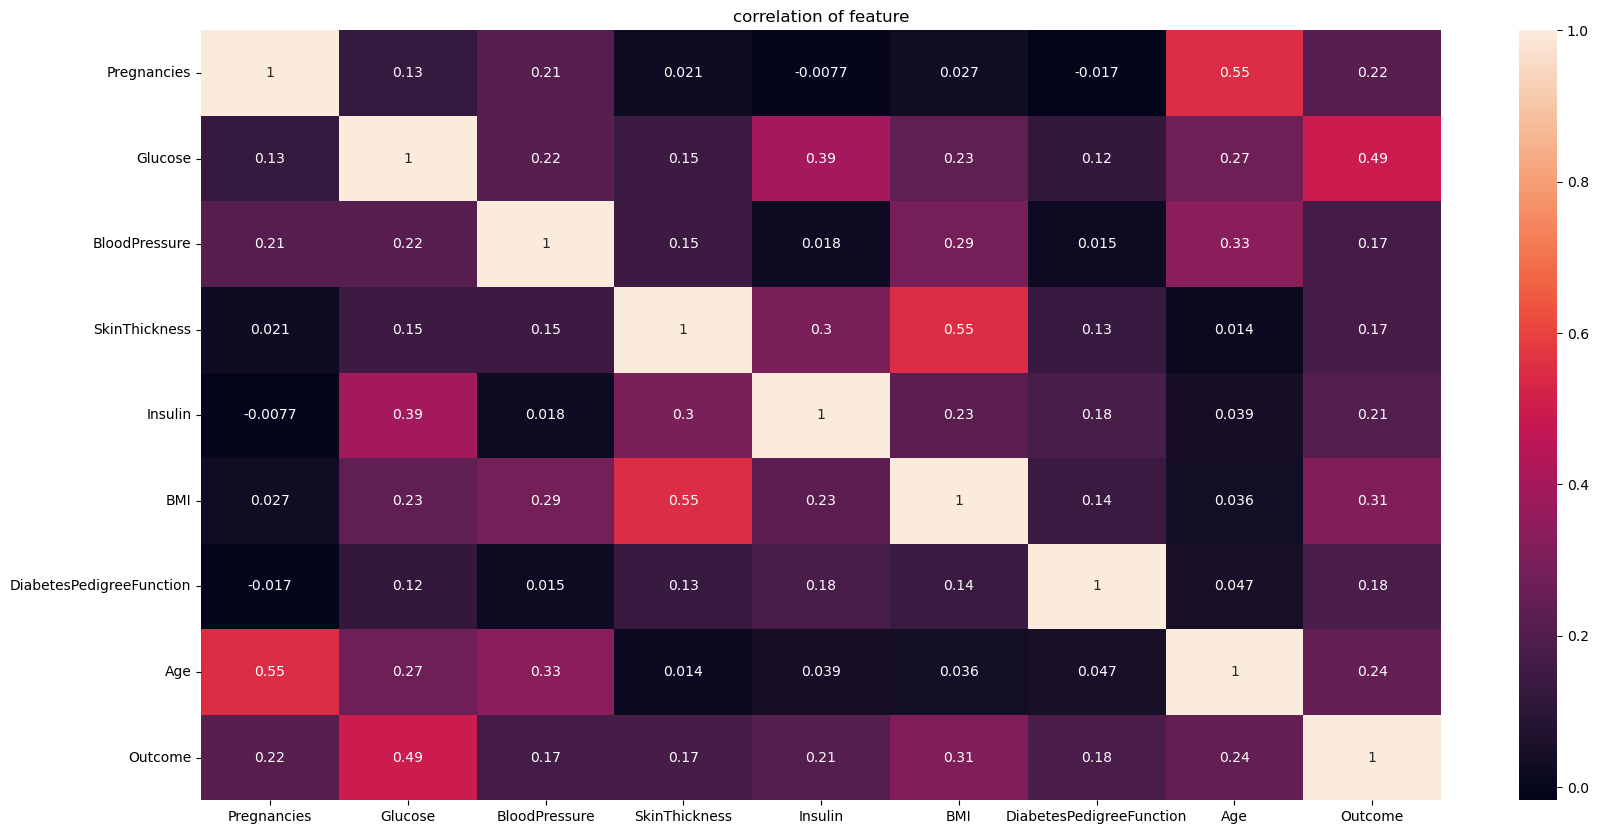

In [32]:
# Heatmap of correlation

plt.figure(figsize = (20,10))
sns.heatmap(da.corr(), annot=True)
plt.title("correlation of feature")

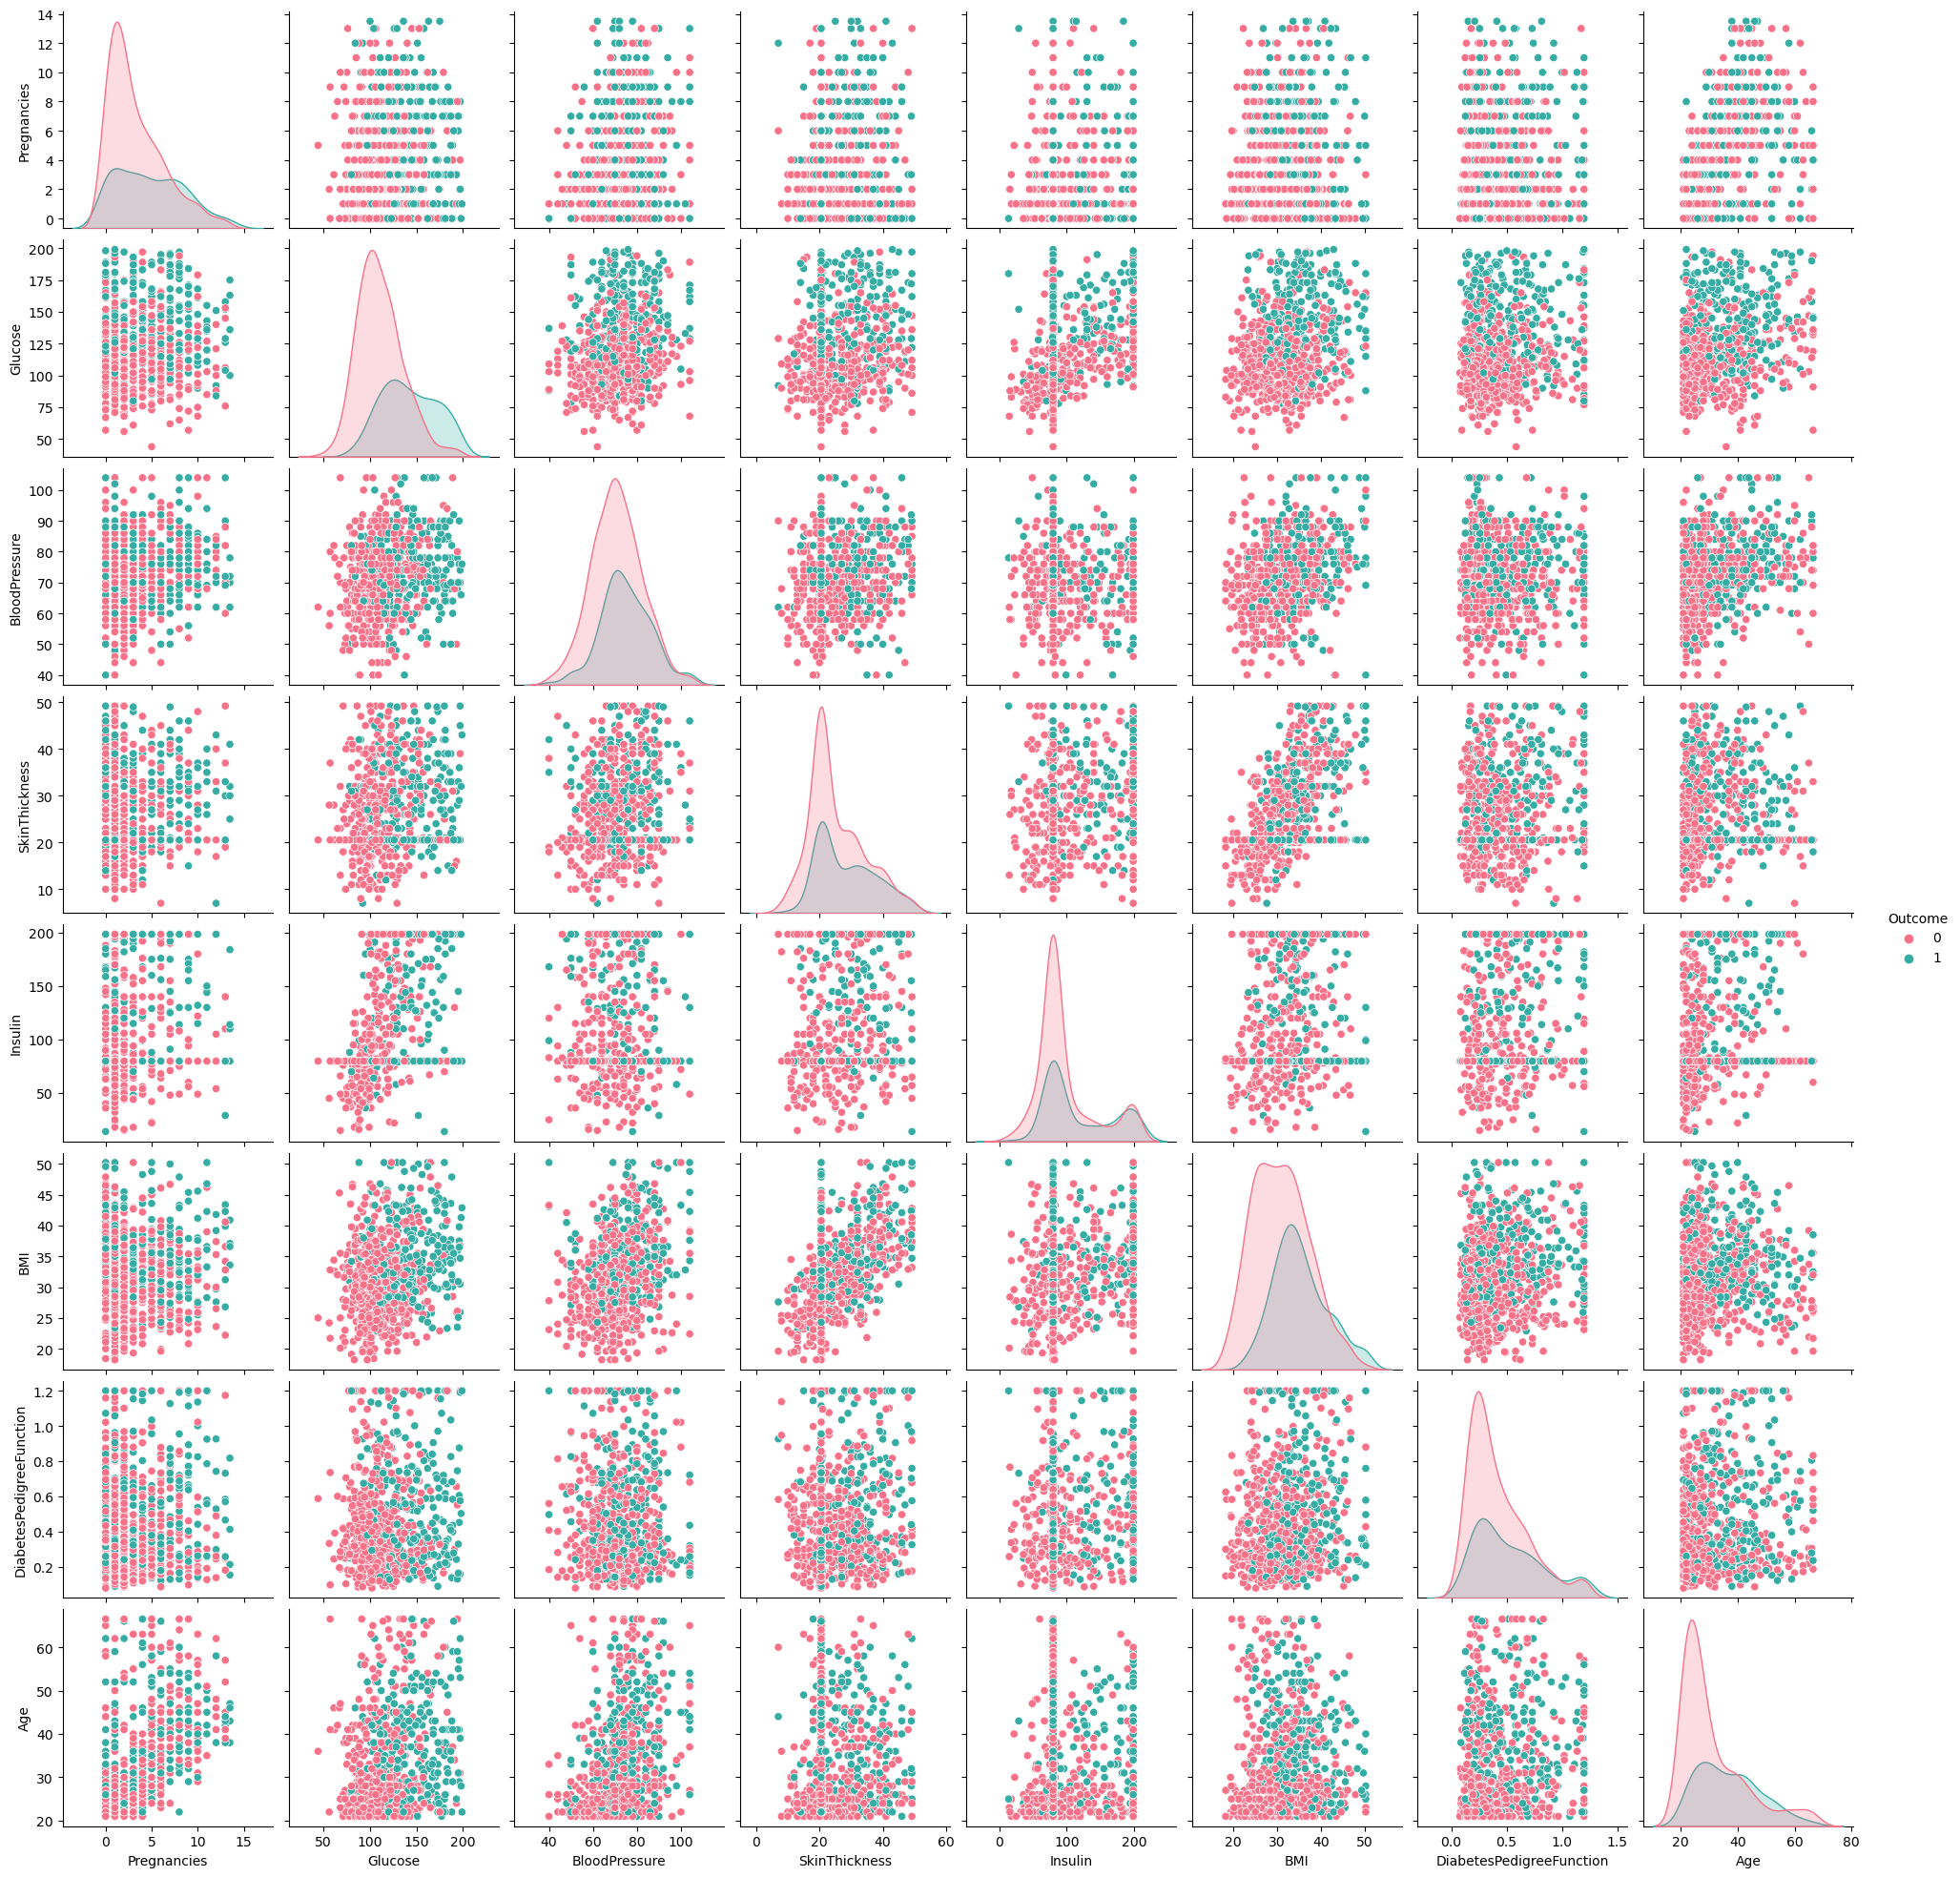

In [33]:
# Pairplot of dataset - variables relation with Outcome

sns.pairplot(da, hue='Outcome', palette="husl")


# Result:

1. high Glucose level in pregnancy increase the risk of diabetes.

2. BMI Above 30 and high level of Glucose togather increase the risk of diabetes.

3. We can see here that increasing Glucose level is the key factor which increase the risk of diabetes.

4. High Glucose level along with other variables increase the risk of diabetes.

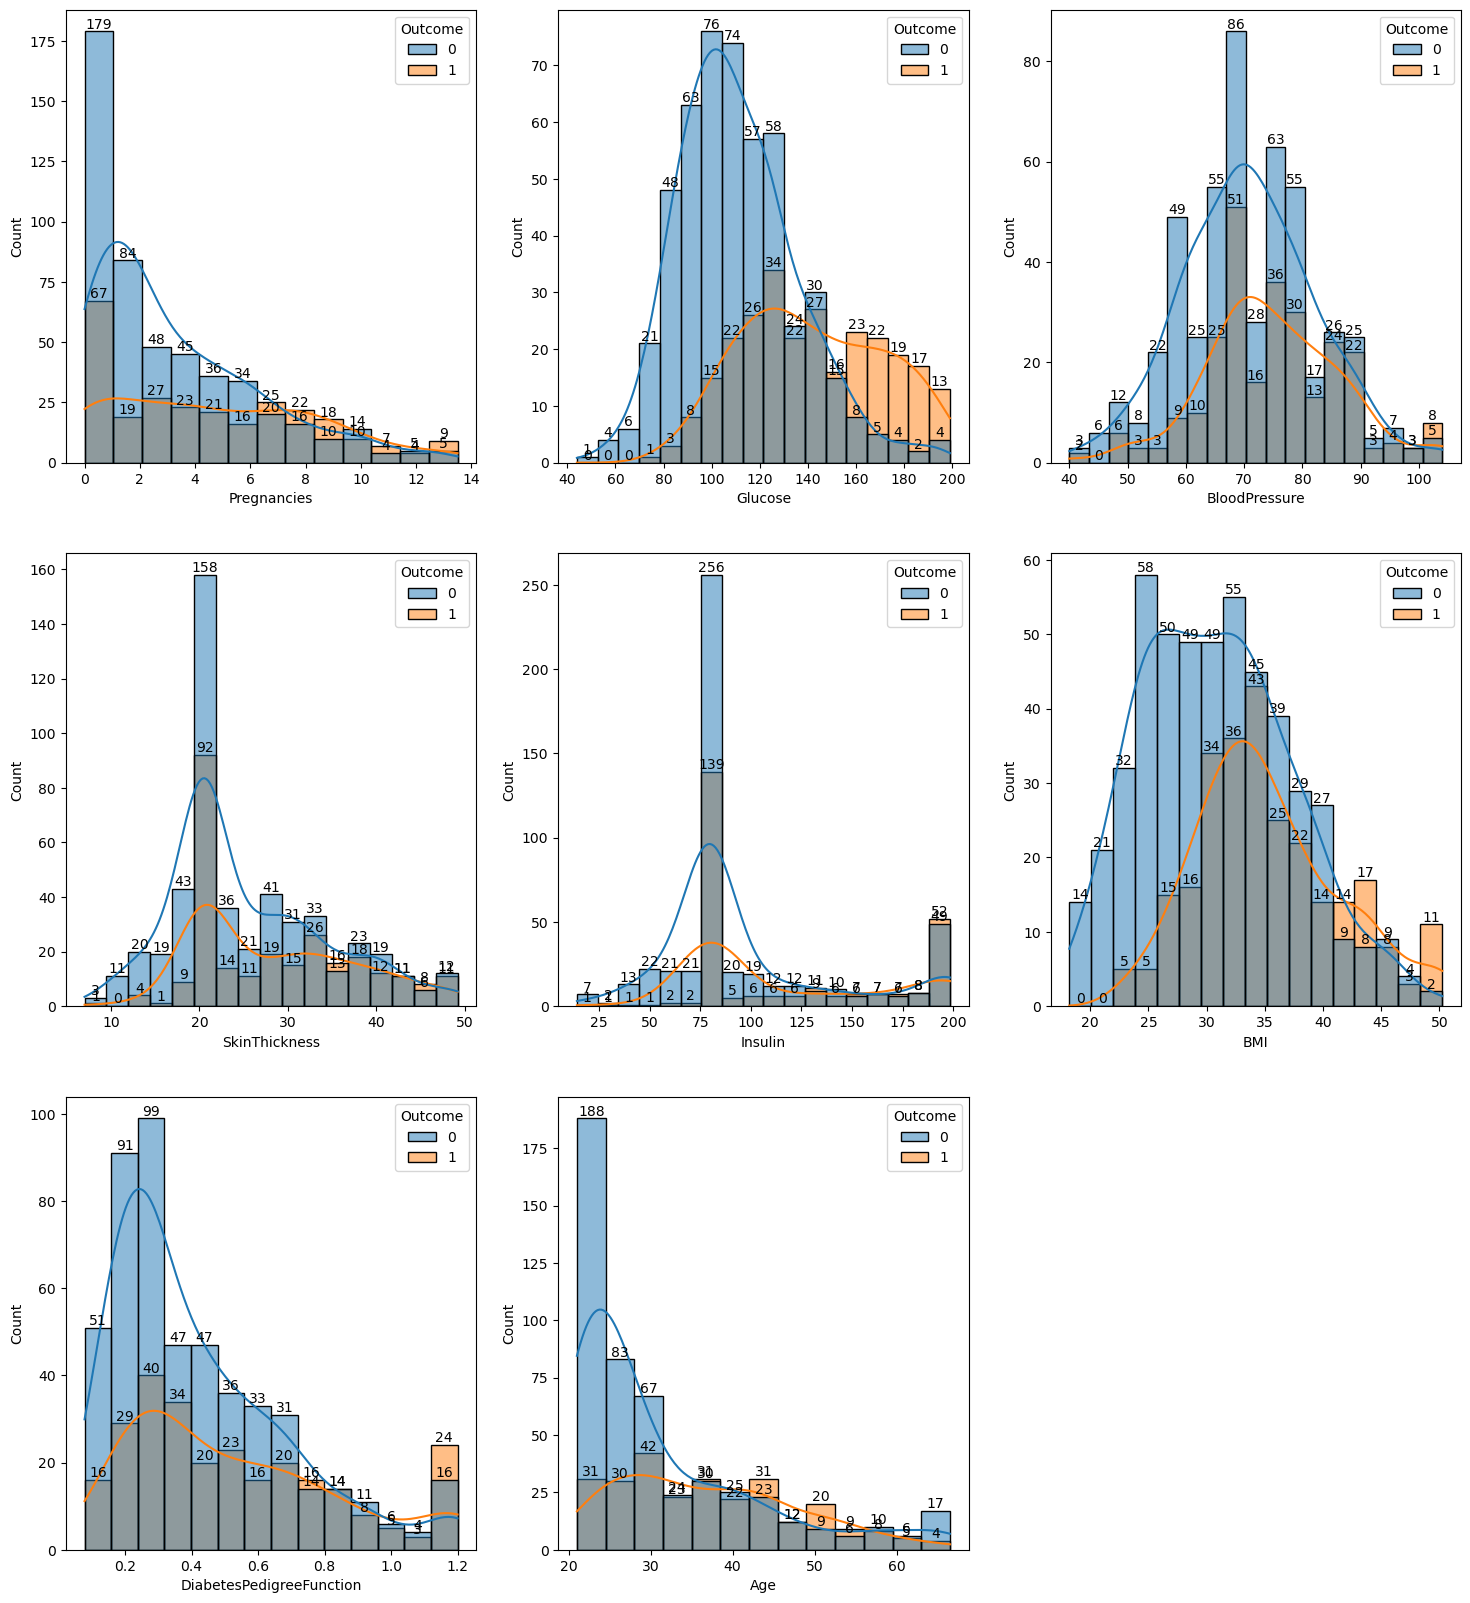

In [34]:
# Histplot of dataset - variables relation with Outcome

pno = 1
plt.figure(figsize=(18,20))
for i in da.columns:
        if pno<9:
            plt.subplot(3,3,pno)
            ax = sns.histplot(data = da , x = i , hue = da.Outcome , kde = True);
            plt.xlabel(i)
            pno+=1
            for i in ax.containers:     #to set a label on top of the bars.
                ax.bar_label(i,)

Result:

1. When the number of pregnancies increases the risk of diabetes also increase.

2. When the level of Glucose increase above 140 the risk of diabetes also increase.

3. Blood pressure between 60 to 90 have more diabetic people then other rate.

4. Risk of diabetes increase when skin thickness increase.

5. Insulin level affect diabetes when its level increase the risk of diabetes also increase.

6. When BMI increase above 30 the risk of diabetes also increase.

7. Risk of diabetes increase when age increase.

Output variable distribution

    

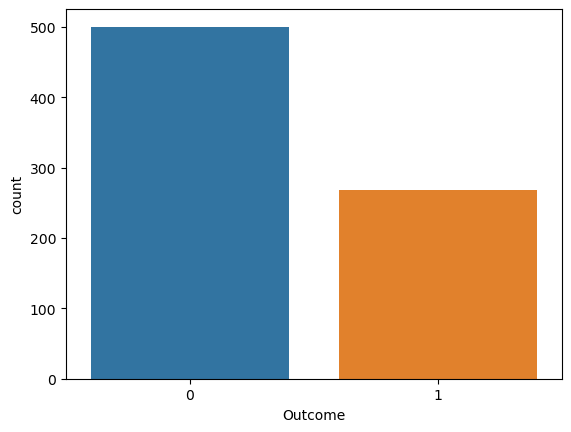

In [35]:
sns.countplot(x ='Outcome', data = da);

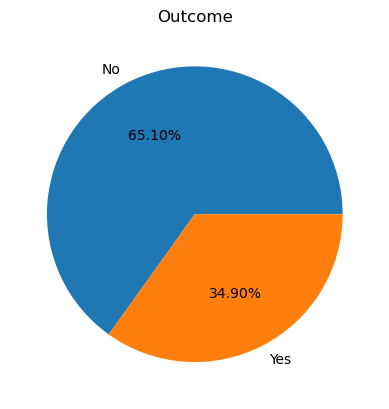

In [36]:
plt.title('Outcome')
plt.pie(da['Outcome'].value_counts(),labels=['No','Yes'], autopct='%1.2f%%')
plt.show()